#  ¿Cómo se mueve un péndulo? 

> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

Referencias: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html

**En realidad esto es el estudio de oscilaciones. **
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="http://images.iop.org/objects/ccr/cern/51/3/17/CCast2_03_11.jpg" width="300px" height="100px" />


<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Animated-mass-spring-faster.gif/150px-Animated-mass-spring-faster.gif" width="125px" height="50px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/74/Simple_harmonic_motion_animation.gif" width="325px" height="50px" />


 </div>

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema ` masa-resorte` y el `péndulo simple`. 

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="150px" height="50px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="200px" height="100px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

___
## Sistema `masa-resorte`

La solución a este sistema `masa-resorte` se explica en términos de la segunda ley de Newton. Para este caso, si la masa permanece constante y solo consideramos la dirección en $x$. Entonces,
\begin{equation}
F = m \frac{d^2x}{dt^2}.
\end{equation}

¿Cuál es la fuerza? ** Ley de Hooke! **
\begin{equation}
F = -k x, \quad k > 0.
\end{equation}

Vemos que la fuerza se opone al desplazamiento y su intensidad es proporcional al mismo.  Y $k$ es la constante elástica o recuperadora del resorte. 

Entonces, un modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
\frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

<font color=red> Ver en el tablero que significa solución de la ecuación diferencial.</font>

### **¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

In [14]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from ipywidgets import interact_manual,interact
sns.set()

Codificando el vector y como [z, x]
y considerando que:
$$ z=\dfrac{dx}{dt} $$
Tenemos entonces que el vector derivadas será:
$$ [-\dfrac{k}{m}x,z]$$

In [2]:
#Se define la función 
def derivadas(y,t,k,m):
    return [-k/m*y[1],y[0]]

In [15]:
def problema(k,m,x0,z0):
    t=np.linspace(0,20,200)
    #Se resuelve la ecuación
    sol=odeint(derivadas,[z0,x0],t,args=(k,m))
    #Posición contra tiempo
    plt.plot(t,sol[:, 1],label="Posición")
    #Velocidad contra tiempo
    plt.plot(t,sol[:, 0],label="Velocidad")
    plt.legend()
    plt.show()

interact_manual(problema,k=(.1,10),m=(.1,10),x0=(.1,10),z0=(.1,10))

interactive(children=(FloatSlider(value=5.05, description='k', max=10.0, min=0.1), FloatSlider(value=5.05, des…

<function __main__.problema(k, m, x0, z0)>

# Animación

In [4]:
%matplotlib notebook
k,m,x0,z0=1.2,.5,.3,2
t=np.linspace(0,20,200)
sol=odeint(derivadas,[z0,x0],t,args=(k,m))

In [5]:
z=np.linspace(0,.75,8)

<IPython.core.display.Javascript object>


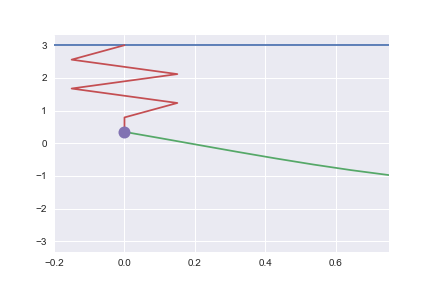

In [11]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(-.2,.75), ylim=(min(sol[:,1])-2, max(sol[:,1])+2))
ax.plot((-1,1),(3,3))
funcion, =ax.plot(z,sol[0:8,1])
resorte, =ax.plot([0,-.15,.15,-.15,.15,0,0],[3-i*(3-sol[0,1])/6 for i in range(7)])
pesa, = ax.plot(0,sol[0,1],'o',markersize=12)
def animate(i):
    pesa.set_data(0,sol[i,1])
    return pesa,
def animate2(i):
    a=[3-j*(3-sol[i,1])/6 for j in range(6)]
    a.append(sol[i,1])
    resorte.set_data([0,-.15,.15,-.15,.15,0,0],a)
    return resorte,
def animate3(i):
    b=sol[i:8+i,1]
    funcion.set_data(z,b)
    return funcion,

anim = animation.FuncAnimation(fig,animate,150,interval=100)
anim2 = animation.FuncAnimation(fig,animate2,150,interval=100) 
anim3 = animation.FuncAnimation(fig,animate3,150,interval=100)   
plt.show()

___
## Péndulo simple
Ahora, si fijamos nuestra atención al movimiento de un péndulo simple _(oscilaciones pequeñas)_, la ecuación diferencial a resolver tiene la misma forma:

\begin{equation}
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta = 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l}.
\end{equation}

La diferencia más evidente es como hemos definido a $\omega_{0}$. Esto quiere decir que, 

\begin{equation}
\theta(t) = A\cos(\omega_{0} t) + B\sin(\omega_{0}t)
\end{equation}

Si graficamos la ecuación de arriba vamos a encontrar un comportamiento muy similar al ya discutido anteriormente. Es por ello que ahora veremos el movimiento en el plano $xy$. Es decir, 

\begin{align}
x &= l \sin(\theta), \quad
y = l \cos(\theta) 
\end{align}

### Condiciones iniciales 

> **Actividad.** Modificar el programa anterior para incorporar las condiciones iniciales. 

### Plano fase  $(x, \frac{dx}{dt})$

La posición y velocidad para el sistema `masa-resorte` se escriben como: 

\begin{align}
x(t) &= x(0) \cos(\omega_{o} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{o} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)]
\end{align}

In [19]:
g=9.81
l=1
theta=np.pi/2
omega=2
def pendulo(y,t):
    return [y[1],-(g/l)*y[0]]

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


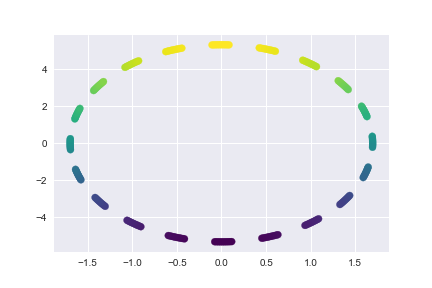

In [21]:
t=np.linspace(0,20,200)
#Se resuelve la ecuación
sol2=odeint(pendulo,[theta,omega],t)
#Posición contra velocidad
plt.scatter(sol2[:,0],sol2[:,1],c=sol2[:,1],cmap= 'viridis')
plt.show()

<IPython.core.display.Javascript object>


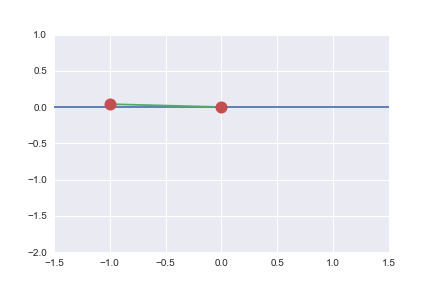

In [44]:
sol2=np.array(sol2)
fig, ax = plt.subplots()
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-2,1))
ax.plot((-1.5,1.5),(0,0))
linea, =ax.plot([0,l*np.sin(sol2[0,0])],[0,-l*np.cos(sol2[0,0])])
pendulo,=ax.plot([l*np.sin(sol2[0,0])],[-l*np.cos(sol2[0,0])],'o',markersize=12)
def animate4(i):
    pendulo.set_data([0,l*np.sin(sol2[i,0])],[0,-l*np.cos(sol2[i,0])])
    return pendulo,
def animate5(i):
    linea.set_data([0,l*np.sin(sol2[i,0])],[0,-l*np.cos(sol2[i,0])])
    return linea,

anim = animation.FuncAnimation(fig,animate4,200,interval=100)
anim2= animation.FuncAnimation(fig,animate5,200,interval=100)
plt.show()

# Con plotly

In [25]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected=True)

In [50]:
layout=go.Layout(title="Pendulo",yaxis=dict(title="x"),xaxis=dict(title="y"))

figure={'data': [
        {
            'x': [0,l*np.sin(sol2[0,0])],
            'y': [0,-l*np.cos(sol2[0,0])],
            'mode': 'lines+markers'}
],
        'layout': {'xaxis': {'range': [-1, 1], 'autorange': False},
                     'yaxis': {'range': [-1, 1], 'autorange': False},
                   'updatemenus':[{'type':'buttons','buttons': [
            {
                'args': [None, {'frame': {'duration': 100, 'redraw': True},
                         'fromcurrent': True, 'transition': {'duration': 0, 'easing':'bounce'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }]}],
                  },
                   
        'frames': [{'data': [{'x':[0,l*np.sin(sol2[i,0])] ,'y':[0,-l*np.cos(sol2[i,0])] ,
                    'mode': 'lines+markers'}]} for i in range(200)]
       }
        
py.offline.iplot(figure)